# 구직자를 위한 기업 정보 한눈에 - 연봉/규모/성장성을 중심으로

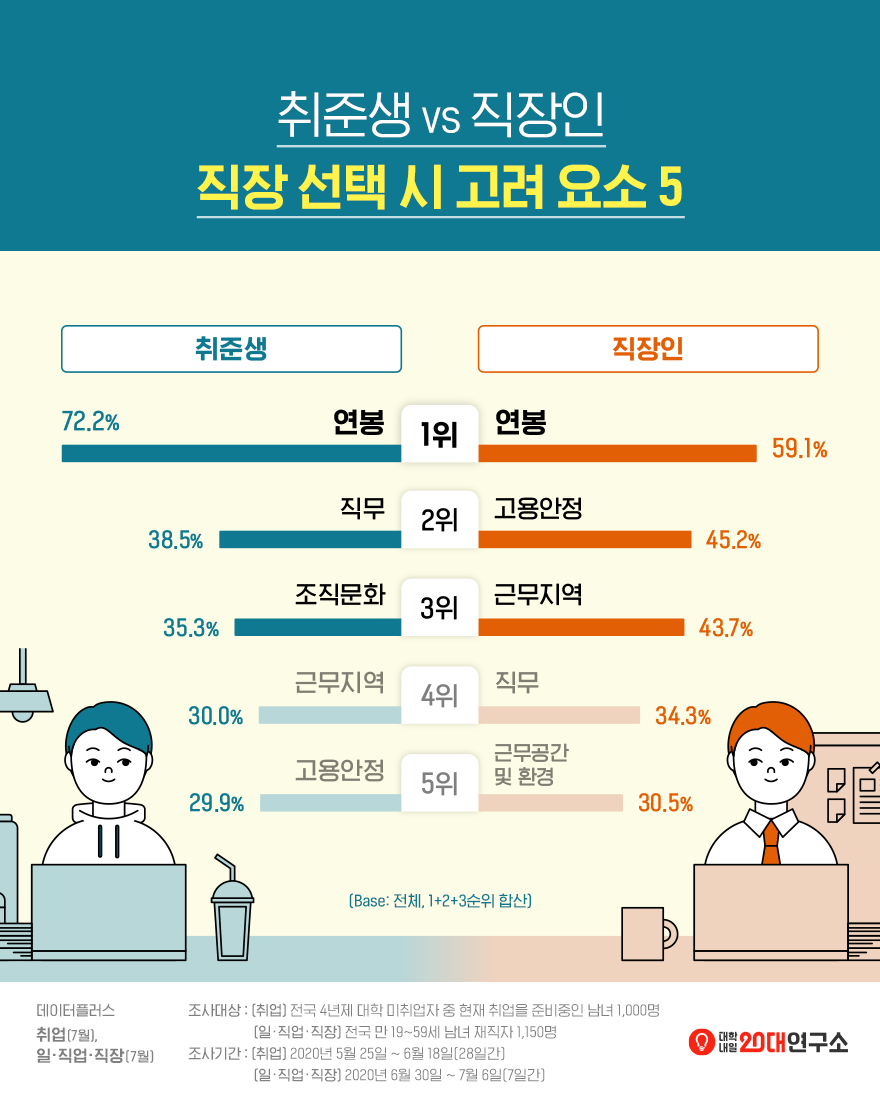

In [9]:
from PIL import Image

Image.open('image/취준생_직장인_직업_선택_요소.png')

#### 위 조사 결과를 비롯한 수많은 구직자 고려 요소 조사에서 '연봉'은 항상 1위로 꼽힙니다.
#### 하지만 저도 그랬고, 이러한 '연봉' 정보를 얻기가 굉장히 힘들었어서
#### 워크넷, 잡코리아, 사람인 등 구인구직 웹사이트를 들어가서 관련 정보를 얻고 있는 상황입니다.
#### </br>
#### 저는 기업에 대한 정보를 '연봉' 정보를 중심으로 기업의 규모와 성장 가능성을 쉽게 볼 수 있다면
#### 해당 기업의 현재 급여 정보와 미래 급여 정보를 일부 추정해 볼 수 있다고 생각해서, 이 부분을 시각화로 나타내고자 했습니다.
#### </br>
#### 또한 실제 근무자들의 기업 평가, 현재 구인중인 직무, 기업 가치관 등 '연봉' 외에도 실제로 기업 선택 시 살펴봐야 할 정보들이 있습니다. 
#### 이러한 정보들은 대시보드에서 해당 기업 홈페이지, 구인구직 웹사이트들과 바로 연결되는 프로세스를 구축하면서 보완하려고 했습니다. 

*** 

## 1. 사용 데이터
### 데이터 불러오기
#### [1] DART
#### 1-1) 기업개황: https://opendart.fss.or.kr/guide/detail.do?apiGrpCd=DS001&apiId=2019002
* OPEN API를 활용해서 해당 데이터들을 불러왔습니다.
* 총 89,366개의 기업이 선별되었는데, 이 중 stock_code(주식 코드)가 있는 3,401개의 기업만 선별했습니다.  

#### 1-2) 직원현황: https://opendart.fss.or.kr/guide/detail.do?apiGrpCd=DS002&apiId=2019011
* OPEN API를 활용해서 해당 데이터들을 불러왔습니다.
* 위 3,401개의 기업 중 2,587개의 기업만 데이터가 존재했습니다.
* 직원 수, 월급 등 데이터가 없는 케이스 등을 제거했습니다.
* 월급 단위가 USD로 되어 있다거나, 금액이 터무니없는 케이스 등을 일부 제외했습니다.
* 이상한 문자가 포함된 금액 데이터를 정제하는 작업을 진행했습니다.

#### 1-3) 주요계정: https://opendart.fss.or.kr/guide/detail.do?apiGrpCd=DS003&apiId=2019016
* 2020년 기준의 사업보고서만 추출했습니다.
* 사업보고서 중 손익계산서, 그 중에서도 기업 성장성을 보기 위해 매출액, 영업이익, 단기손이익 데이터만 남겼습니다.
* 기간이 제각각이라 회계년도 기준으로 통일하는 작업을 진행했습니다.

#### [2] 국민연금 가입 사업장 내역: https://www.data.go.kr/data/15083277/fileData.do
* CSV 데이터로 해당 데이터를 불러왔습니다.
* 상용, 일용이 기업명에 포함된 케이스 일부를 제외했습니다.
* 인크루트 웹사이트의 정보를 참고해서 국민연금으로 연봉 추정액을 계산했습니다. (https://incruit.uservoice.com/knowledgebase/articles/1077145-%EA%B5%AD%EB%AF%BC%EC%97%B0%EA%B8%88-%EC%A0%95%EB%B3%B4%EB%A1%9C-%EC%96%B4%EB%96%BB%EA%B2%8C-%EC%97%B0%EB%B4%89%EC%A0%95%EB%B3%B4%EB%A5%BC-%EA%B3%84%EC%82%B0%ED%95%98%EB%82%98%EC%9A%94)  
* 최종적으로 520,573개 기업의 정보가 남았습니다.

### 최종 활용 데이터
#### [1] 두 데이터를 merge한 데이터
* 두 데이터를 연결할 key값이 없어서 사업자명을 최대한 정제해서 key값을 만들고 데이터를 연결했습니다.
* 최종적으로 1,123개 기업의 데이터를 확보했습니다.

#### [2] 국민연금 가입 사업장 내역 데이터
* 업종별 직원수, 연봉에 대한 정보 추이를 파악하고자 해당 데이터도 활용했습니다.
#### </br>
***

## 2. 대시보드 시각화

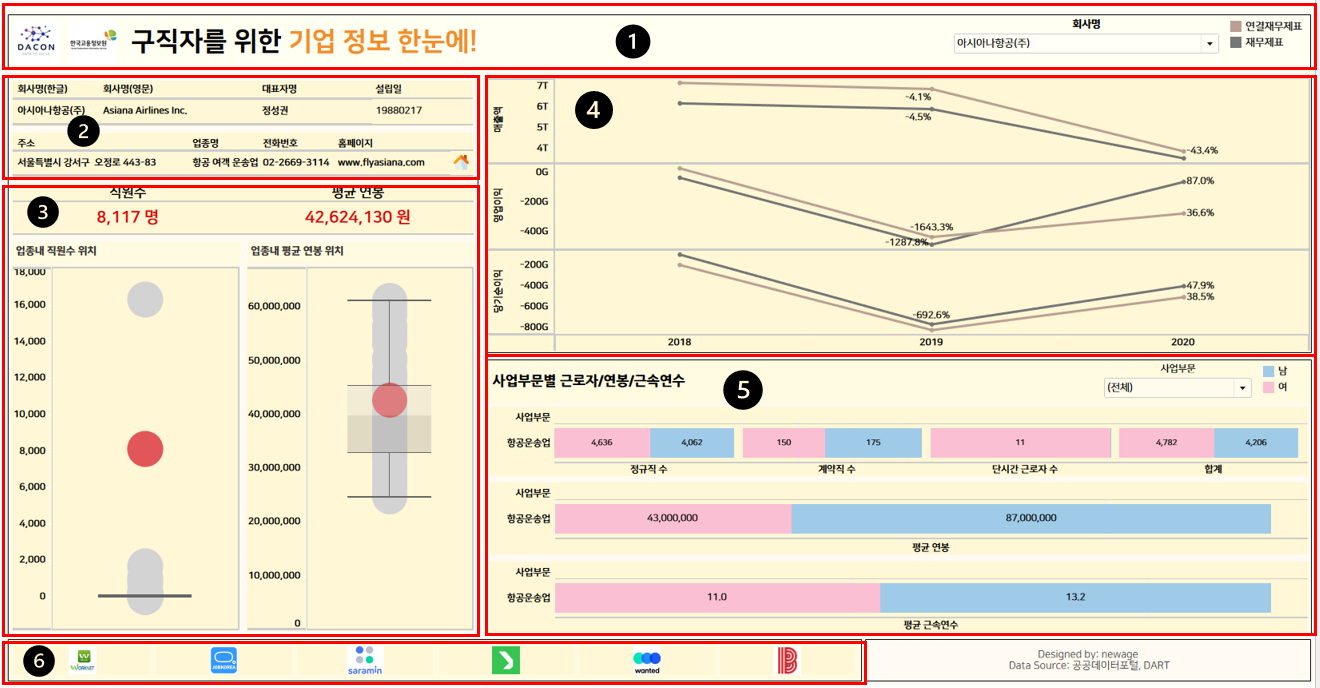

In [10]:
Image.open('image/dashboard_1.png')

### 대시보드 시각화는 크게 6가지 부분으로 이루어져 있습니다.

### [1]. 제목 및 필터
* 대시보드 제목이 나와있으며, 회사명을 선택할 수 있는 필터가 있습니다.
* 회사명을 선택하면 아래의 모든 항목이 필터에 따라서 바뀝니다.
* 아래 4번의 그래프에서 재무제표/연결재무제표가 어떤 색인지에 대한 legend도 나타나 있습니다.

### [2]. 기업 기본 정보
* 회사명(한글, 영문), 대표자명, 설립일, 주소, 업종명, 전화번호, 홈페이지 주소 정보가 있습니다.
* 홈페이지 주소나 집 모양 아이콘을 누르면 해당 회사의 홈페이지로 이동합니다. (홈페이지 주소가 올바른 케이스에)

### [3]. 직원수 & 평균 연봉
* 해당 기업의 전체 직원수와 평균 연봉 정보가 나와 있습니다.
* 동일 업종 안에서 해당 기업의 직원수와 평균 연봉 위치를 Boxplot을 통해 가늠해 볼 수 있습니다.
* 연봉 수준과 기업 규모를 판단할 수 있게 구성했습니다.

### [4]. 매출액 & 당기순이익 & 영업이익
* 2018 ~ 2020까지의 매출액, 영업이익, 당기순이익이 나타나 있습니다.
* 이를 통해, 기업의 성장성을 가늠해 볼 수 있습니다.

### [5]. 사업부문별 근로자/연봉/근속연수
* 기업 내 사업부별 근로자, 연봉, 근속연수를 성별별로 알 수 있게 구성했습니다.
* 사업부문 필터에서 특정 사업부를 선택하면, 해당 사업부 정보만 나오도록 구성했습니다.
* 남녀 구분 기준 legend도 나타나 있습니다.
* 사업부문별 연봉과 근속년수 등 기업의 특징을 더 자세히 알 수 있습니다.

### [6]. 구인구직 사이트 연결 링크
* 왼쪽부터 차례대로 워크넷, 잡코리아, 사람인, 잡플래닛, 원티드, 블라인드 로고입니다.
* 해당 로고를 클릭하면, 자동으로 지금 필터링 되어있는 기업명 검색 결과 창으로 연결됩니다.
* 이를 통해, 위 대시보드에서 알 수 없는 추가적인 정보를 외부 사이트에서 쉽게 얻을 수 있도록 하였습니다.
---
#### </br>

## 3. 정리
### 3-1. 활용 효과
* 기업에 대한 간략한 정보를 쉽게 파악할 수 있다.
* 연봉 수준과 직원 수를 가늠해 보고, 업종 내에서 해당 기업의 위치를 알 수 있다.
* 사업부별/성별별로 연봉 수준, 근속연수도 볼 수 있으며, 정규직/계약직/단기 근로자 수도 파악할 수 있다.
* 매출액, 영업이익, 당기순이익을 바탕으로 기업의 성장성을 알 수 있다.
* 홈페이지, 구인구직 사이트와 연결이 되어 있어서 외부 소스에 바로 연결이 가능하다.

### 3-2. 한계점
* 모든 기업을 나타낸 것이 아닌, 일부 기업으로만 시각화를 진행했다.
* 데이터 상 오류가 있는 부분이나, 없는 부분이 존재한다. (특히 DART쪽 급여 데이터)
* 기업의 연봉과 성장성에만 집중해서 시각화를 했기 때문에, 구직자가 원하는 모든 기업 정보를 담지는 못했다. (링크 연결로 일부 보완)